In [8]:
import pandas as pd
import numpy as np
import time
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import xml.etree.ElementTree as ET

from Bio import Entrez
Entrez.email = "ecc7@illinois.edu"

In [9]:
def is_journal_article(xml_data):
    print("Parsing XML data to check for journal article type...")
    root = ET.fromstring(xml_data)
    for article in root.findall(".//PubmedArticle"):
        for article_type in article.findall(".//PublicationType"):
            if article_type.text == "Journal Article":
                return True
    return False

def get_references(xml_data):
    print("Parsing XML data to count references...")
    count = 0
    root = ET.fromstring(xml_data)
    for ref in root.findall(".//Reference"):
        article_id = ref.find(".//ArticleId[@IdType='pubmed']")
        if article_id is not None:
            count += 1

    return count

def build_sample_from_range(id_2020, id_2025, sample_size=10, output_dir="../outputs", filename="pubmed_references.csv"):
    valid_pmids = []
    refs = []

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, filename)

    for _ in tqdm(range(sample_size)):
        pmid = str(np.random.choice(range(int(id_2020), int(id_2025)+ 1)))

        while True:
            try:
                handle = Entrez.efetch(db="pubmed", id=pmid, retmode="xml")
                xml_data = handle.read()
                handle.close()
                reference_pmids = get_references(xml_data)
                if reference_pmids >= 5 and is_journal_article(xml_data):
                    valid_pmids.append(pmid)
                    refs.append(reference_pmids)
                    break
                else:
                    pmid = str(np.random.choice(range(int(id_2020), int(id_2025)+1)))
            except:
                time.sleep(5)
                
    df = pd.DataFrame({
        'node_id': valid_pmids,
        'out_degree': refs
    })
    df.to_csv(output_path, index=False)
    return df

In [15]:
df = build_sample_from_range(id_2020='31901868', id_2025='40486797', sample_size=10)


 10%|█         | 1/10 [00:00<00:04,  2.04it/s]

Parsing XML data to count references...
Parsing XML data to check for journal article type...
Parsing XML data to count references...
Parsing XML data to count references...


 20%|██        | 2/10 [00:01<00:08,  1.08s/it]

Parsing XML data to count references...
Parsing XML data to check for journal article type...


 30%|███       | 3/10 [00:02<00:06,  1.03it/s]

Parsing XML data to count references...
Parsing XML data to count references...
Parsing XML data to check for journal article type...


 40%|████      | 4/10 [00:03<00:04,  1.30it/s]

Parsing XML data to count references...
Parsing XML data to check for journal article type...
Parsing XML data to count references...
Parsing XML data to check for journal article type...
Parsing XML data to count references...
Parsing XML data to count references...


 50%|█████     | 5/10 [00:05<00:06,  1.21s/it]

Parsing XML data to count references...
Parsing XML data to check for journal article type...


 60%|██████    | 6/10 [00:06<00:04,  1.10s/it]

Parsing XML data to count references...
Parsing XML data to count references...
Parsing XML data to check for journal article type...


 70%|███████   | 7/10 [00:06<00:02,  1.13it/s]

Parsing XML data to count references...
Parsing XML data to check for journal article type...


 80%|████████  | 8/10 [00:07<00:01,  1.34it/s]

Parsing XML data to count references...
Parsing XML data to check for journal article type...
Parsing XML data to count references...


 90%|█████████ | 9/10 [00:08<00:00,  1.21it/s]

Parsing XML data to count references...
Parsing XML data to check for journal article type...


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]

Parsing XML data to count references...
Parsing XML data to check for journal article type...


In [17]:
df

,node_id,out_degree
0,32444656,60
1,34943279,30
2,37087421,6
3,32089532,31
4,38877042,34
5,35539490,21
6,37003030,44
7,37225701,41
8,37317853,82
9,39271655,22


In [ ]:
print(df['out_degree'].min()) 

6


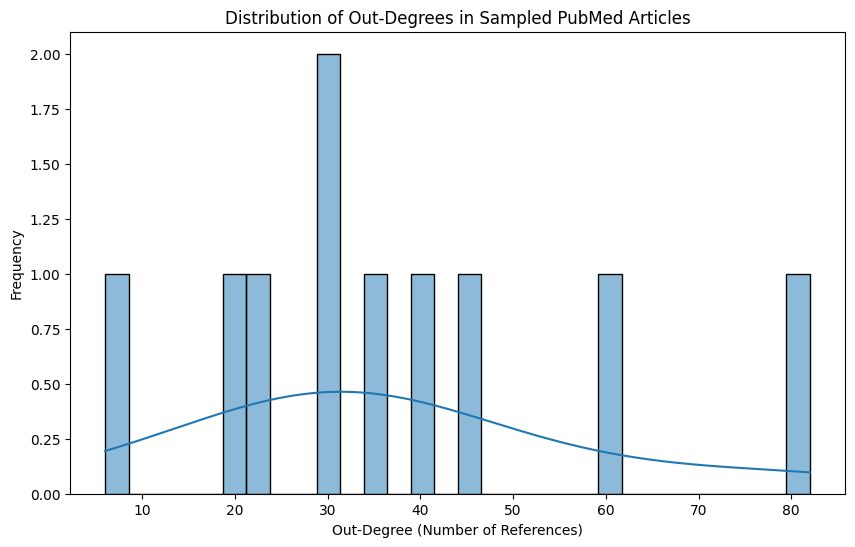

In [18]:
csv_path = "../outputs/pubmed_references.csv"
df = pd.read_csv(csv_path)

plt.figure(figsize=(10, 6))
sns.histplot(df['out_degree'], bins=30, kde=True)
plt.title('Distribution of Out-Degrees in Sampled PubMed Articles')
plt.xlabel('Out-Degree (Number of References)')
plt.ylabel('Frequency')
plt.show()


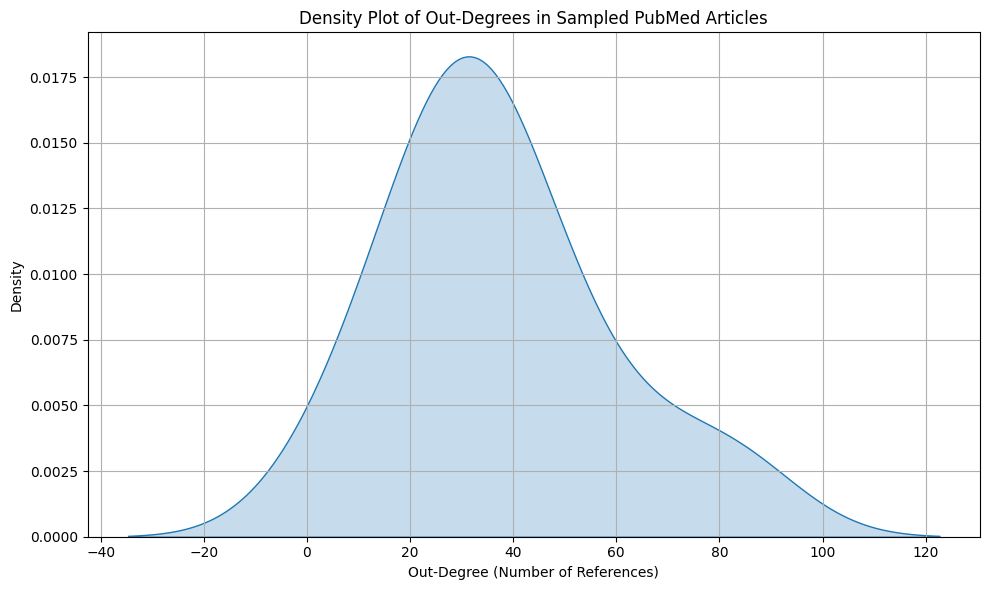

In [22]:
df = pd.read_csv("../outputs/pubmed_references.csv")

# Plot the density
plt.figure(figsize=(10, 6))
sns.kdeplot(df['out_degree'], fill=True, bw_adjust=1)
plt.title('Density Plot of Out-Degrees in Sampled PubMed Articles')
plt.xlabel('Out-Degree (Number of References)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: divide by zero encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: overflow encounter

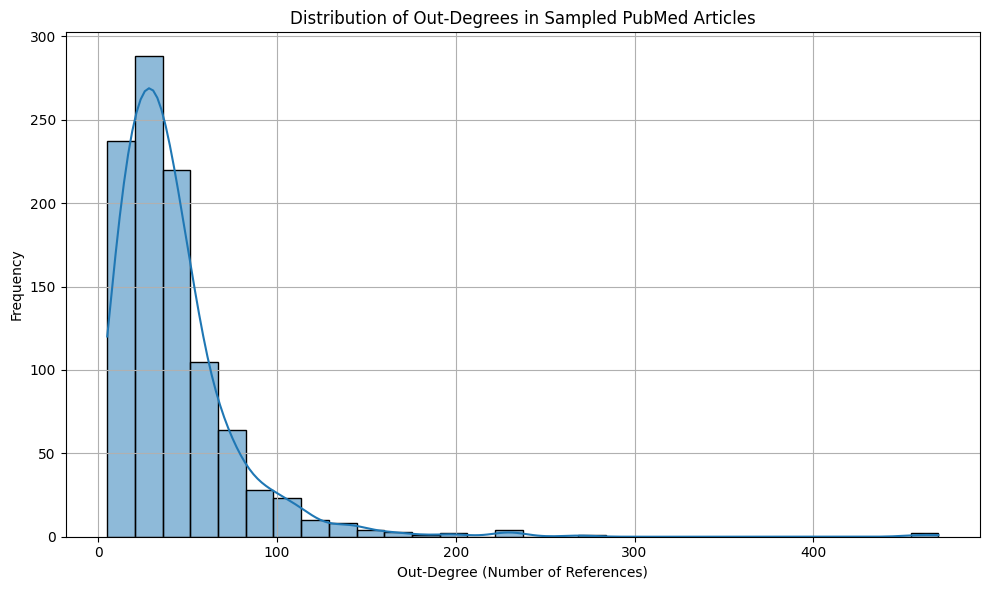

In [23]:
csv_path = "../outputs/pubmed_references_1000.csv"
df = pd.read_csv(csv_path)

plt.figure(figsize=(10, 6))
sns.histplot(df['out_degree'], bins=30, kde=True)
plt.title('Distribution of Out-Degrees in Sampled PubMed Articles')
plt.xlabel('Out-Degree (Number of References)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: divide by zero encountered in dot
  scaled_dataset = dot(whitening, self.dataset)
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/seaborn/external/kde.py:248: RuntimeWarning: overflow encounter

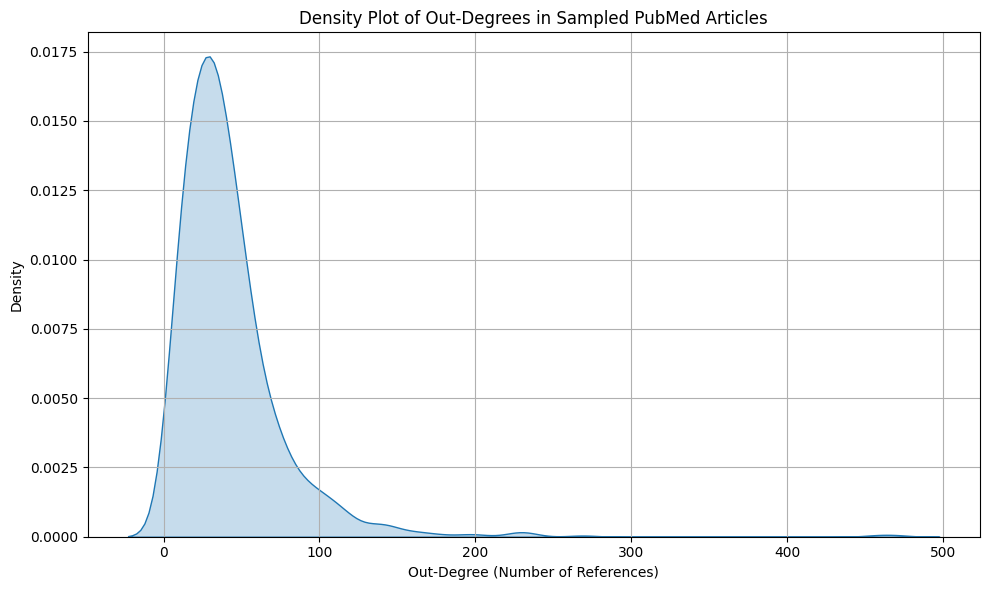

In [24]:

# Load from CSV
df = pd.read_csv("../outputs/pubmed_references_1000.csv")

# Plot the density
plt.figure(figsize=(10, 6))
sns.kdeplot(df['out_degree'], fill=True, bw_adjust=1)
plt.title('Density Plot of Out-Degrees in Sampled PubMed Articles')
plt.xlabel('Out-Degree (Number of References)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()
